#### Importing the require libraries

In [30]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the dataset

In [31]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [32]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Checking the outliers 

<AxesSubplot:xlabel='age'>

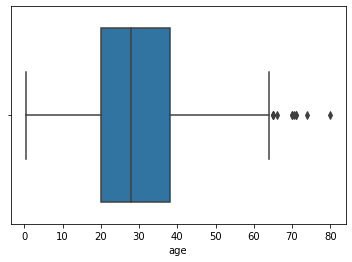

In [33]:
sns.boxplot(df.age)

#### filling the missing values

In [34]:
df['age']=df['age'].fillna(df['age'].median())

In [35]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Drop the unwanted feature 

In [36]:
df=df.drop('deck',axis=1)

In [37]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

#### Visualize the null values by using heatmap

<AxesSubplot:>

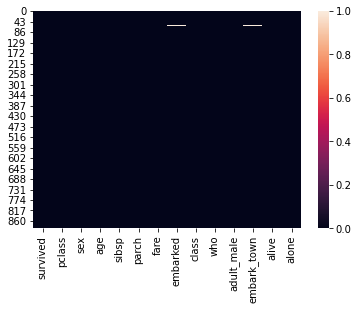

In [38]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='survived', ylabel='age'>

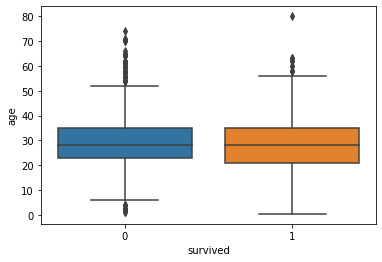

In [39]:
sns.boxplot(df.survived,df.age)

<AxesSubplot:xlabel='survived', ylabel='age'>

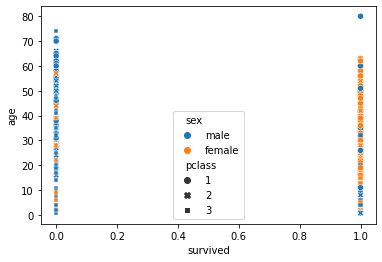

In [40]:
sns.scatterplot(x=df.survived,y=df.age,hue=df['sex'],style=df['pclass'])

In [41]:
df.groupby('survived').std()

,pclass,age,sibsp,parch,fare,adult_male,alone
survived,,,,,,,
0,0.735805,12.499986,1.288399,0.823166,31.388207,0.386320,0.466421
1,0.863321,13.764425,0.708688,0.771712,66.596998,0.437792,0.500184


In [42]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='survived', ylabel='count'>

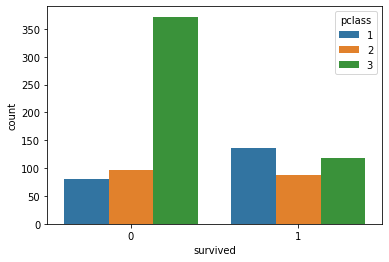

In [43]:
#analysis:- we notice that pclass 1 is more likely to survive as compare to pclass 3 
sns.countplot(x=df['survived'],hue=df.pclass)

<AxesSubplot:xlabel='survived', ylabel='count'>

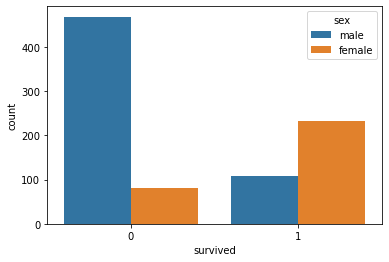

In [44]:
#analysis:- we notice that female are thrice more likely to survive than male
sns.countplot(x=df['survived'],hue=df['sex'])

<AxesSubplot:>

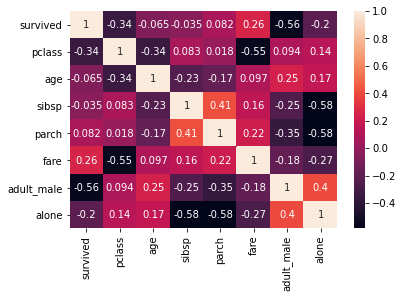

In [45]:
#here in the graph i understand the correlation between the features
#survival and fare correlation in 0.25
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Survival vs Age')

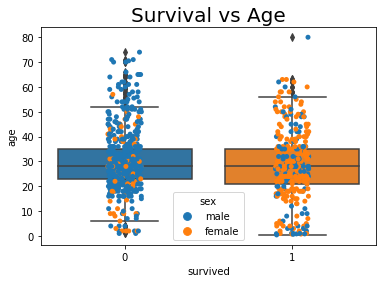

In [46]:
sns.boxplot(x='survived',y='age',data=df)
sns.stripplot(x='survived',y='age',data=df,edgecolor='black',hue=df['sex'])
plt.title('Survival vs Age',fontsize=20)

<AxesSubplot:ylabel='Frequency'>

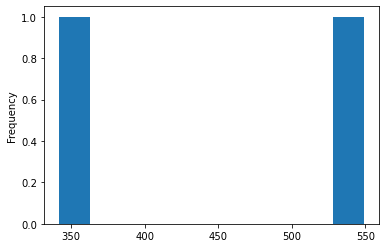

In [47]:
df['survived'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='survived'>

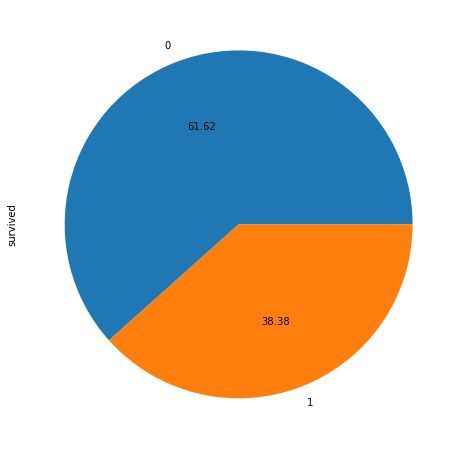

In [48]:
df['survived'].value_counts().plot(kind='pie',autopct='%.2f',figsize=(10,8))

<AxesSubplot:ylabel='Frequency'>

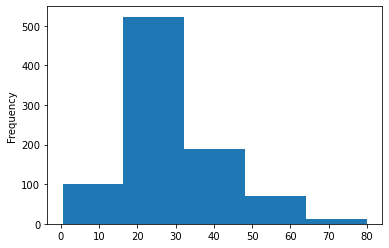

In [49]:
#### analysis:- we notice that more age group people are between 20-30 and very less 65-80
df['age'].plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

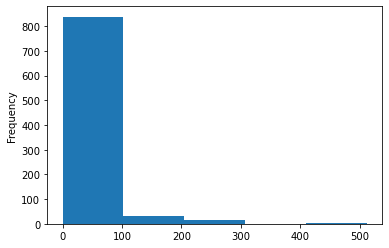

In [50]:
#analysis:- we observe that most of the ticket bought under 100 and very few 200-500
df['fare'].plot.hist(bins=5)

<AxesSubplot:xlabel='pclass', ylabel='age'>

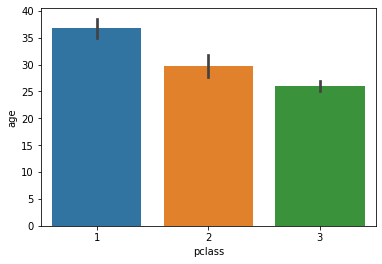

In [51]:
# analysis:- we observe here in pclass more young people are travel
sns.barplot(df['pclass'],df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

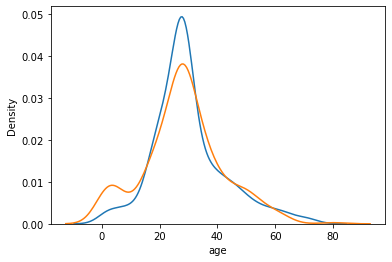

In [53]:
# for better understanding we use distplot
sns.distplot(df[df['survived']==0]['age'],hist=False)
sns.distplot(df[df['survived']==1]['age'],hist=False)

In [54]:
pd.crosstab(df['pclass'],df['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='survived', ylabel='pclass'>

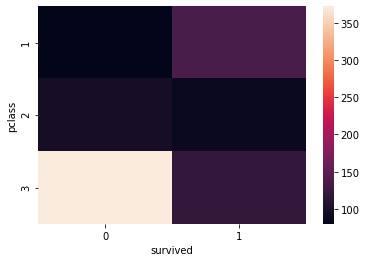

In [55]:
#analysis:- here we can easily visualise pclass vs survived 
sns.heatmap(pd.crosstab(df['pclass'],df['survived']))

In [56]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [57]:
# one-hot encoding 
gender=pd.get_dummies(df['sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [60]:
city=pd.get_dummies(df['embarked'],drop_first=True)

In [61]:
city.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [62]:
pas_class=pd.get_dummies(df['pclass'],drop_first=True)
pas_class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [64]:
df2=pd.concat([df,gender,city,pas_class],axis=1)
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,0,1,0,1


In [67]:
df2.drop(['sex','pclass','embarked','parch','who','class','alone','embark_town','alive','adult_male'],axis=1,inplace=True)

In [68]:
df2.head()

,survived,age,sibsp,fare,male,Q,S,2,3
0,0,22.0,1,7.2500,1,0,1,0,1
1,1,38.0,1,71.2833,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,1
3,1,35.0,1,53.1000,0,0,1,0,0
4,0,35.0,0,8.0500,1,0,1,0,1


## Training the model

In [69]:
x=df2.drop(['survived'],axis=1)
y=df2['survived']

In [70]:
x.head()

,age,sibsp,fare,male,Q,S,2,3
0,22.0,1,7.2500,1,0,1,0,1
1,38.0,1,71.2833,0,0,0,0,0
2,26.0,0,7.9250,0,0,1,0,1
3,35.0,1,53.1000,0,0,1,0,0
4,35.0,0,8.0500,1,0,1,0,1


In [71]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [78]:
x_train.shape

(712, 8)

In [79]:
y_train.shape

(712,)

In [80]:
x_test.shape

(179, 8)

In [81]:
y_test.shape

(179,)

In [93]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Apply Logistics Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr=LogisticRegression()

In [96]:
lr.fit(x_train,y_train)

LogisticRegression()

In [97]:
prediction=lr.predict(x_test)

#### CONFUSION MATRIX

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[88, 17],
       [20, 54]], dtype=int64)

#### Checking Model Accuracy

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7932960893854749

#### Classification Report

In [100]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,prediction)

In [101]:
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



# Apply Random Forest Classifier

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=33)

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
prediction=rf_classifier.predict(X_test)

## Hyperparameter Tuning

#### Randomized Search CV

In [106]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']} ## always given as a key-value pairs
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [107]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [108]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [109]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=120, max_features='sqrt',
                       min_samples_leaf=4, n_estimators=2000)

In [111]:
best_random_grid=rf_randomcv.best_estimator_

In [116]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print('Model Accuracy:',accuracy_score(Y_test,y_pred))

[[99  8]
 [20 52]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.87      0.72      0.79        72

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179

Model Accuracy: 0.8435754189944135
